In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
dataset['sex']=dataset['sex'].replace('female',0)
dataset['sex']=dataset['sex'].replace('male',1)
dataset['smoker']=dataset['smoker'].replace('yes',1)
dataset['smoker']=dataset['smoker'].replace('no',0)
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
dataset['region']=dataset['region'].replace('southwest',0)
dataset['region']=dataset['region'].replace('southeast',1)
dataset['region']=dataset['region'].replace('northwest',2)
dataset['region']=dataset['region'].replace('northeast',3)

In [17]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [18]:
x=dataset.drop('charges',axis=1)
y=dataset['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
x_train.head()

,age,sex,bmi,children,smoker,region
859,57,1,28.100,0,0,0
1327,51,1,30.030,1,0,1
564,18,0,32.120,2,0,1
739,29,1,35.500,2,1,0
966,51,1,24.795,2,1,2


In [23]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)
y_predict=reg.predict(x_test)
print(y_test.head())
print(y_predict)
reg.coef_
reg.intercept_

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
Name: charges, dtype: float64
[ 8133.51943754  5894.31003754 15178.20829332 11547.36438338
  3775.03393675  9640.08750972  9657.05966353 26248.03916144
  7858.22876491 31002.57119038  1770.84044399  4188.95663485
  7423.82718419 11283.51091837 12928.02342892 11184.80792819
  5757.46866587 18268.91702277 10711.1674724  31079.34446351
 34303.66853341  4281.30133891  1256.79751956  7363.75232989
  4546.50961138 13423.42555065 11824.97964537 10428.24636358
  6396.70395686 31189.71351311 -1736.0781217  34143.71681594
  9664.00723013  7477.88842505  8232.03452625 12124.65723238
 13491.01539861 12652.4022658   9966.3961165   8510.35969257
 16091.36282443  9892.16804325  5537.21953748 11516.72703076
  5550.61981933  7525.95696024  6692.58058193 34449.86330783
 11145.60241435 10692.61155255 32978.84679072  5677.79898797
 10362.16045048 14704.2925041  11340.80139173 13504.10536333
 12219.09721342 

-13200.326100849928

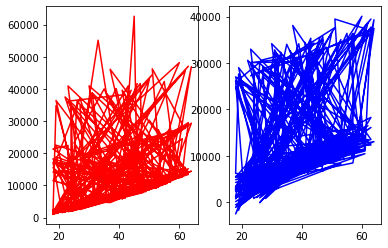

In [28]:
# plotting the plots on basis of few colums
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x_test['age'],y_test,'r')
ax2.plot(x_test['age'],y_predict,'b')
plt.show()